In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[ 0.14728742,  0.15603948, -0.52184543,  0.03376721,  0.44470005,
        -0.18634316,  0.71051027, -0.3501063 ,  1.47198751,  0.06881153],
       [-0.70645446, -0.61670277, -1.11327189,  1.32801888,  1.03560806,
         0.36279579,  0.15252827,  0.19828567,  1.16436309, -1.26377427]])

In [4]:
test_Features[:2]

array([[-0.80151452, -0.43604884, -1.01487715,  1.00637054,  0.73336721,
        -0.27798315, -0.55899859, -0.09668394,  1.58895137, -1.10577041],
       [-0.38217715,  0.03840347,  0.16691777, -0.60624734, -0.62671663,
         0.66254324,  0.46645736, -0.94137553, -0.91866709,  0.68636552]])

In [5]:
train_Label[:4]

array([0, 1, 1, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=10*4,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=10*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=10*2,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=10,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(10, activation='tanh'))

In [20]:
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 40)             160       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 40)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 30)             3630      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 30)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 20)             1820      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 20)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 2, 10)             610       
__________

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 4s 382us/step - loss: 0.6543 - acc: 0.6836 - val_loss: 0.5937 - val_acc: 0.7258
Epoch 2/30
10194/10194 [==============================] - 2s 164us/step - loss: 0.5131 - acc: 0.7732 - val_loss: 0.4675 - val_acc: 0.7838
Epoch 3/30
10194/10194 [==============================] - 2s 236us/step - loss: 0.4232 - acc: 0.8166 - val_loss: 0.4258 - val_acc: 0.8070
Epoch 4/30
10194/10194 [==============================] - 2s 233us/step - loss: 0.3955 - acc: 0.8288 - val_loss: 0.4073 - val_acc: 0.8137
Epoch 5/30
10194/10194 [==============================] - 1s 137us/step - loss: 0.3761 - acc: 0.8413 - val_loss: 0.3911 - val_acc: 0.8254
Epoch 6/30
10194/10194 [==============================] - 1s 121us/step - loss: 0.3632 - acc: 0.8482 - val_loss: 0.3810 - val_acc: 0.8395
Epoch 7/30
10194/10194 [==============================] - 1s 105us/step - loss: 0.3529 - acc: 0.8534 - val_loss: 0.3727 - v

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

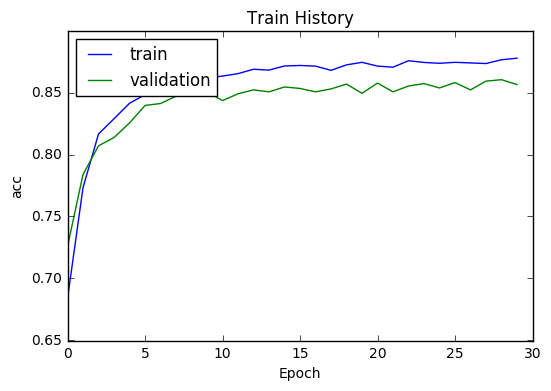

In [25]:
show_train_history(train_history,'acc','val_acc')

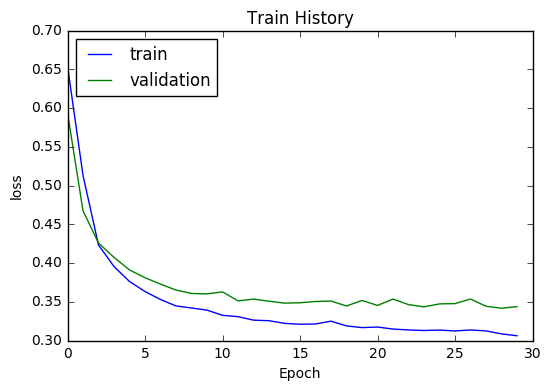

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 133us/step


In [28]:
scores[1]

0.8704795284371515